In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [3]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

#### Step - Add apples to Pan

In [4]:
filtered_apples = final_df[final_df['Step'].str.strip() == 'Add apples to pan']
filtered_apples

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C001,36,Add apples to pan,604.934512,891.537804,751.720262,712.561806,979.341382,3126.059197,0.000000,0.000000
12,C003,58,Add apples to pan,536.236211,735.326429,2176.457761,648.630988,1107.648439,3382.430048,1766.212367,1244.350696
23,C006,42,Add apples to pan,0.000000,3379.233117,0.000000,0.000000,2501.928454,4404.150571,0.000000,0.000000
34,C008,34,Add apples to pan,2304.163176,2880.191997,3410.427345,3041.911670,3421.640744,8070.078953,6199.743605,4392.008600
45,C009,24,Add apples to pan,2344.988669,3274.813739,2672.153843,3108.914340,2660.870183,8043.298615,5350.501010,3900.905669
56,C012,54,Add apples to pan,722.269516,876.952733,1281.925462,994.361602,1805.556497,3998.861141,2327.116645,1475.884196
67,C013,48,Add apples to pan,2371.114133,2803.826064,3753.108766,3354.837484,4728.598911,5798.915955,4207.281884,3285.004349
78,C016,39,Add apples to pan,1159.659473,1743.678861,2539.534217,2253.539045,3095.585149,3733.026661,2765.896671,2106.291680
89,C017,36,Add apples to pan,192.146733,435.118368,627.883894,430.763953,784.540840,1637.282136,1009.332362,1458.600894
100,C020,30,Add apples to pan,469.184298,683.903486,790.653252,602.483685,1058.445109,1975.633517,1238.733965,826.424108


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_apples = filtered_apples.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_apples.select_dtypes(include=['float64', 'int64']).columns
filtered_apples[numerical_cols] = filtered_apples[numerical_cols].replace(0, np.nan)

filtered_apples[numerical_cols] = imputer.fit_transform(filtered_apples[numerical_cols])
filtered_apples

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C001,36.0,Add apples to pan,604.934512,891.537804,751.720262,712.561806,979.341382,3126.059197,1780.217261,1068.079809
12,C003,58.0,Add apples to pan,536.236211,735.326429,2176.457761,648.630988,1107.648439,3382.430048,1766.212367,1244.350696
23,C006,42.0,Add apples to pan,1159.659473,3379.233117,2539.534217,2253.539045,2501.928454,4404.150571,2765.896671,2106.291680
34,C008,34.0,Add apples to pan,2304.163176,2880.191997,3410.427345,3041.911670,3421.640744,8070.078953,6199.743605,4392.008600
45,C009,24.0,Add apples to pan,2344.988669,3274.813739,2672.153843,3108.914340,2660.870183,8043.298615,5350.501010,3900.905669
56,C012,54.0,Add apples to pan,722.269516,876.952733,1281.925462,994.361602,1805.556497,3998.861141,2327.116645,1475.884196
67,C013,48.0,Add apples to pan,2371.114133,2803.826064,3753.108766,3354.837484,4728.598911,5798.915955,4207.281884,3285.004349
78,C016,39.0,Add apples to pan,1159.659473,1743.678861,2539.534217,2253.539045,3095.585149,3733.026661,2765.896671,2106.291680
89,C017,36.0,Add apples to pan,192.146733,435.118368,627.883894,430.763953,784.540840,1637.282136,1009.332362,1458.600894
100,C020,30.0,Add apples to pan,469.184298,683.903486,790.653252,602.483685,1058.445109,1975.633517,1238.733965,826.424108


In [6]:
# Define new column names
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Apples',
    'HeadCamera Distance': 'HeadCamera Distance - Add Apples',
    'LeftElbow Distance': 'LeftElbow Distance - Add Apples',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Apples',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Apples',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Apples',
    'RightElbow Distance': 'RightElbow Distance - Add Apples',
    'RightShoulder Distance': 'RightShoulder Distance - Add Apples'
}

# Rename columns
filtered_apples = filtered_apples.rename(columns=new_column_names)
filtered_apples

,Participant,Block Design Raw Score,Step,Chest Distance - Add Apples,HeadCamera Distance - Add Apples,LeftElbow Distance - Add Apples,LeftShoulder Distance - Add Apples,MotionControllerLeft Distance - Add Apples,MotionControllerRight Distance - Add Apples,RightElbow Distance - Add Apples,RightShoulder Distance - Add Apples
1,C001,36.0,Add apples to pan,604.934512,891.537804,751.720262,712.561806,979.341382,3126.059197,1780.217261,1068.079809
12,C003,58.0,Add apples to pan,536.236211,735.326429,2176.457761,648.630988,1107.648439,3382.430048,1766.212367,1244.350696
23,C006,42.0,Add apples to pan,1159.659473,3379.233117,2539.534217,2253.539045,2501.928454,4404.150571,2765.896671,2106.291680
34,C008,34.0,Add apples to pan,2304.163176,2880.191997,3410.427345,3041.911670,3421.640744,8070.078953,6199.743605,4392.008600
45,C009,24.0,Add apples to pan,2344.988669,3274.813739,2672.153843,3108.914340,2660.870183,8043.298615,5350.501010,3900.905669
56,C012,54.0,Add apples to pan,722.269516,876.952733,1281.925462,994.361602,1805.556497,3998.861141,2327.116645,1475.884196
67,C013,48.0,Add apples to pan,2371.114133,2803.826064,3753.108766,3354.837484,4728.598911,5798.915955,4207.281884,3285.004349
78,C016,39.0,Add apples to pan,1159.659473,1743.678861,2539.534217,2253.539045,3095.585149,3733.026661,2765.896671,2106.291680
89,C017,36.0,Add apples to pan,192.146733,435.118368,627.883894,430.763953,784.540840,1637.282136,1009.332362,1458.600894
100,C020,30.0,Add apples to pan,469.184298,683.903486,790.653252,602.483685,1058.445109,1975.633517,1238.733965,826.424108


In [7]:

tracker_columns = ['Chest Distance - Add Apples', 'HeadCamera Distance - Add Apples', 'LeftElbow Distance - Add Apples', 'LeftShoulder Distance - Add Apples',
                   'RightElbow Distance - Add Apples', 'RightShoulder Distance - Add Apples', 'MotionControllerLeft Distance - Add Apples',
                   'MotionControllerRight Distance - Add Apples']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_apples, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_apples[block_design_col], filtered_apples[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_apples, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Apples,0.162482,0.547691
1,HeadCamera Distance - Add Apples,0.116520,0.667384
2,LeftElbow Distance - Add Apples,0.130628,0.629663
3,LeftShoulder Distance - Add Apples,0.028782,0.915732
4,RightElbow Distance - Add Apples,0.178730,0.507784
5,RightShoulder Distance - Add Apples,0.143279,0.596547
6,MotionControllerLeft Distance - Add Apples,0.140119,0.604755
7,MotionControllerRight Distance - Add Apples,0.266963,0.317541


In [8]:
#filtered_apples.to_csv('ComplexPie_AddApples.csv',index=False)

In [9]:
'''tracker_columns = ['Chest Distance','HeadCamera Distance', 'LeftElbow Distance','LeftShoulder Distance','RightElbow Distance', 'RightShoulder Distance', 
    'MotionControllerLeft Distance','MotionControllerRight Distance']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_apples, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        filtered_df = filtered_apples[filtered_apples[tracker_col] != 0]
        
        # Calculate Spearman correlation and p-value
        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_apples, tracker_columns, block_design_col)
correlation_df'''

"tracker_columns = ['Chest Distance','HeadCamera Distance', 'LeftElbow Distance','LeftShoulder Distance','RightElbow Distance', 'RightShoulder Distance', \n    'MotionControllerLeft Distance','MotionControllerRight Distance']\nblock_design_col = 'Block Design Raw Score'\n\n# Function to calculate and display correlation for each tracker\ndef calculate_correlations(filtered_apples, tracker_columns, block_design_col):\n    correlations = []\n    for tracker_col in tracker_columns:\n        filtered_df = filtered_apples[filtered_apples[tracker_col] != 0]\n        \n        # Calculate Spearman correlation and p-value\n        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])\n        correlations.append({\n            'Tracker': tracker_col,\n            'Correlation': correlation,\n            'P-value': p_value\n        })\n    corr_df = pd.DataFrame(correlations)\n    return corr_df\n\n# Calculate and display correlations\ncorrelation_df = calcul

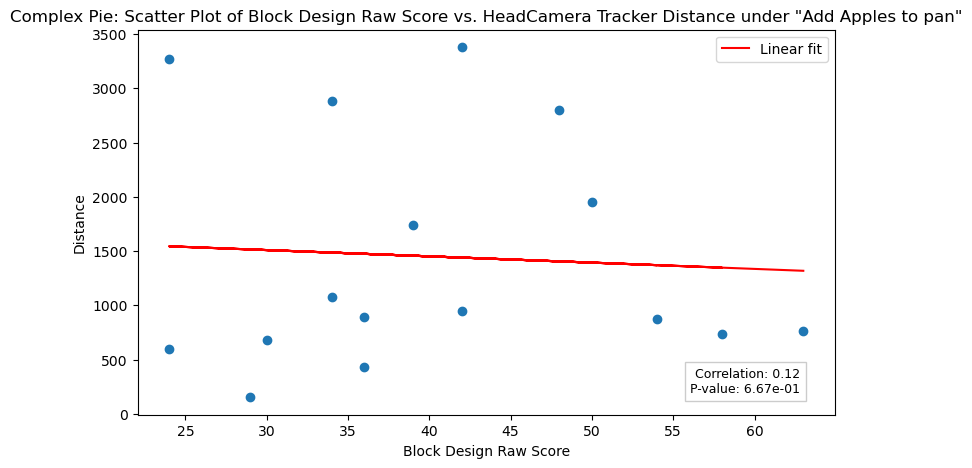

In [11]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '25 CP_ApplesDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

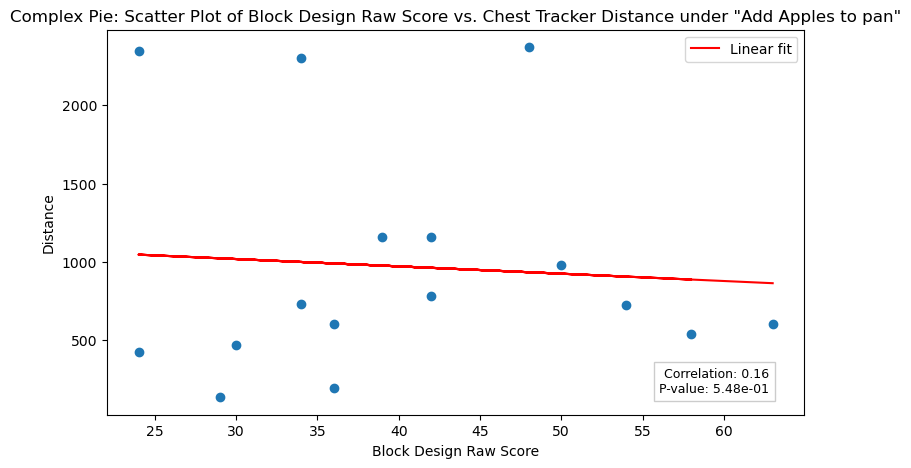

In [12]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '26 CP_ApplesDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

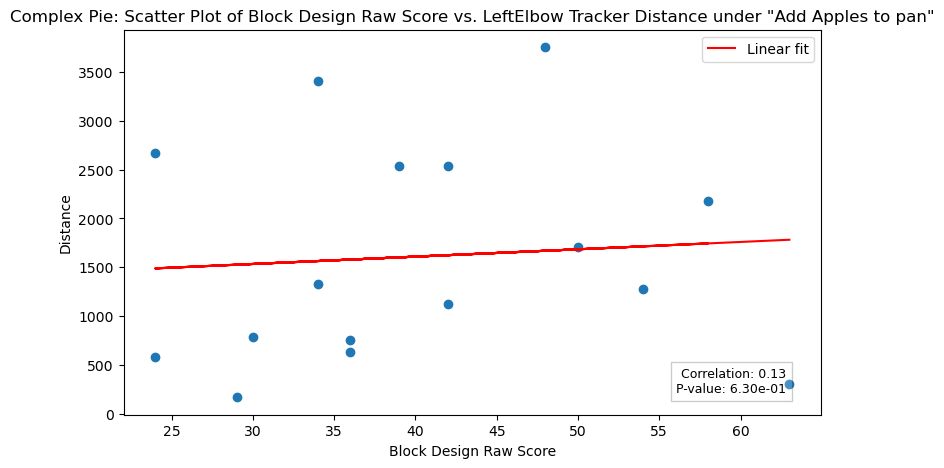

In [13]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '27 CP_ApplesDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

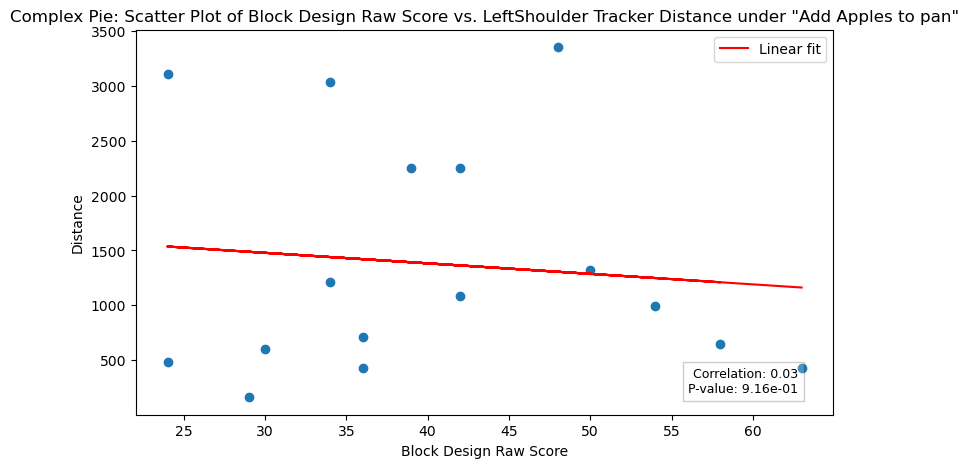

In [14]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '28 CP_ApplesDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

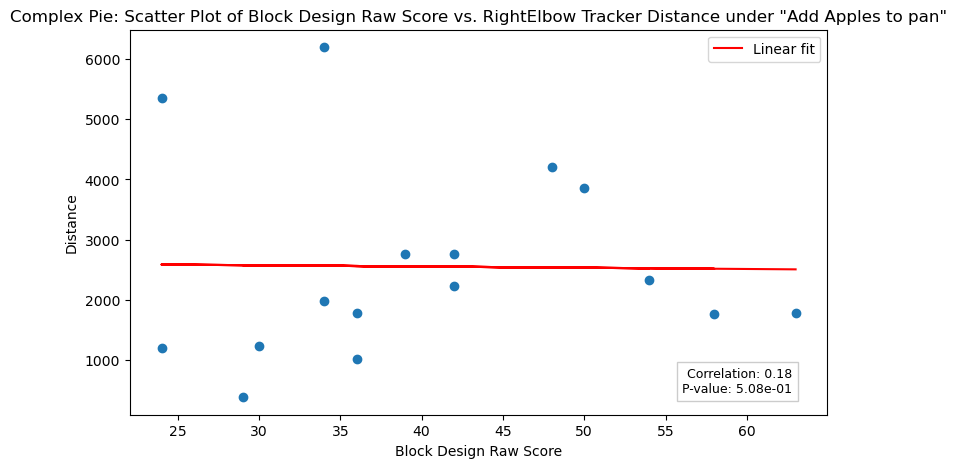

In [15]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '29 CP_ApplesDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

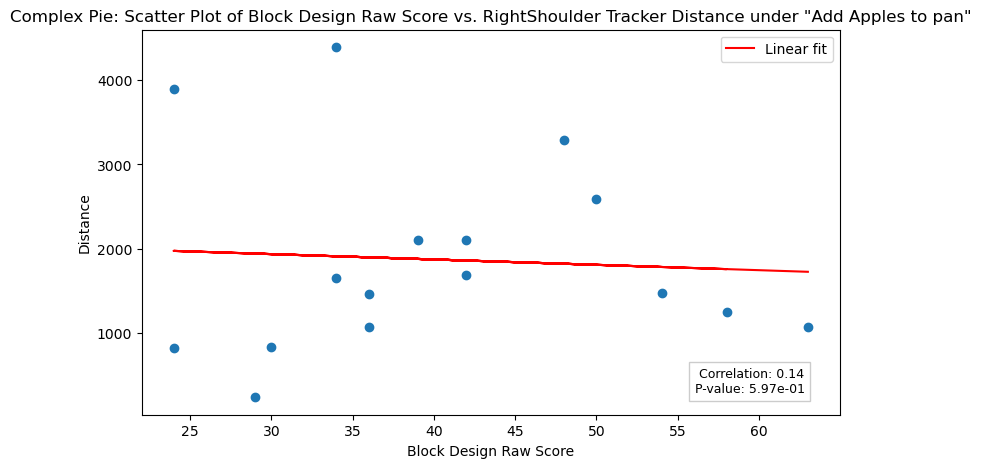

In [16]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '30 CP_ApplesDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

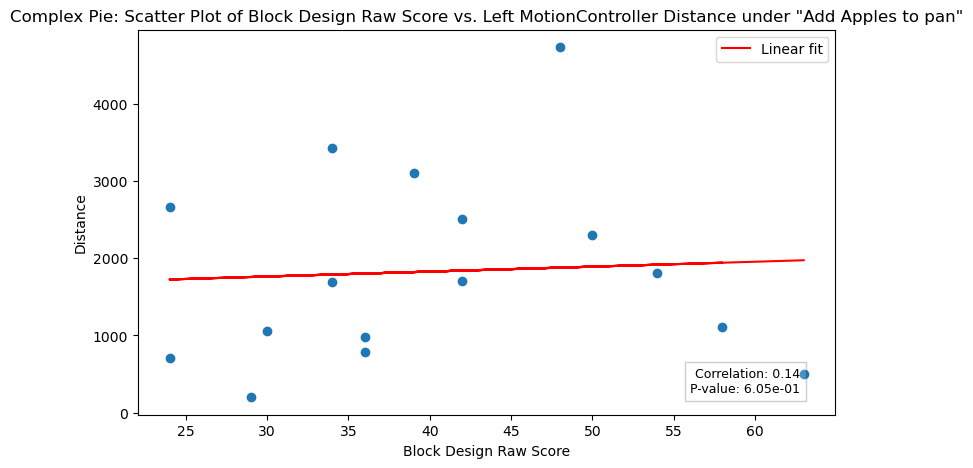

In [18]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '31 CP_ApplesDistanceLeftMotionContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

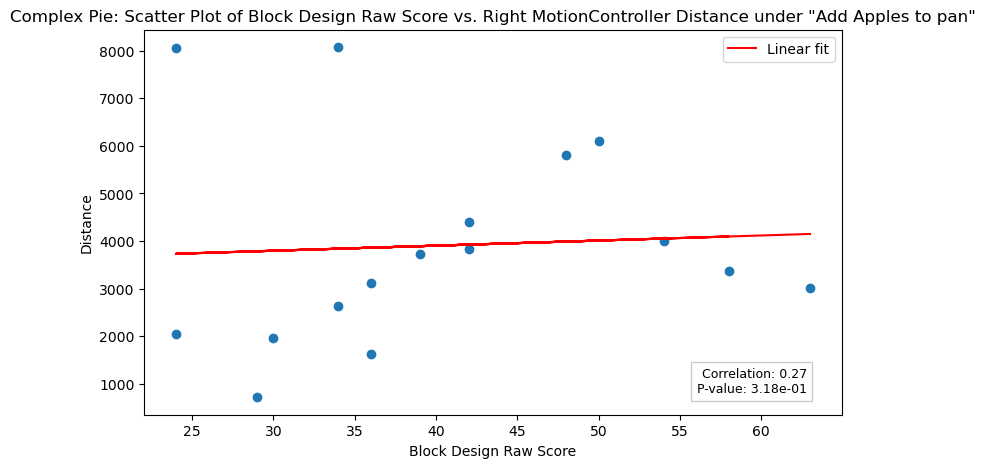

In [19]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '32 CP_ApplesDistanceRightMotionContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()